# PROYECTO FINAL BIG DATA

## Data Woman's Company

## ARRANQUE DEL PROYECTO

### CARGA DE LIBRERIAS

In [112]:
# Instalar libreria geopandas
!pip install geopandas
!pip install matplotlib
!pip install plotly-express
!pip install geopy
!pip install openpyxl
!pip install nbformat

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 KB 1.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 KB 7.3 MB/s eta 0:00:00


In [113]:
# Operaciones basica de datos
import numpy as np
# Analisis y gestion de datos 
import pandas as pd
# Graficas
import matplotlib.pyplot as plt
%matplotlib inline
# Geolocalizador
import geopandas as gpd
# Contiene funciones que pueden crear figuras completas a la vez
import plotly.express as px
# Seaborn es una librería de visualización de datos para Python desarrollada sobre matplotlib
import seaborn as sns
# Obtener datos de geolocalizacion
from geopy.geocoders import Nominatim
import geopy.geocoders
import nbformat
# Este paquete contiene la implementación base del formato Jupyter Notebook,
#y API de Python para trabajar con cuadernos

### CARGA DE LOS DATOS

In [63]:
# Importar y cargar el archivo csv
df = pd.read_csv('airbnb-listings.csv', sep = ';', index_col= 'ID', na_values='#N/D')

In [64]:
# Visualizar el dataframe
df.head(1)

,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
ID,,,,,,,,,,,,,,,,,,,,,
15141125,https://www.airbnb.com/rooms/15141125,20170407214119,2017-04-08,Panoramic charming studio!,"Charming bright and cosy studio in ""El Rastro""...",It's a bright and cosy studio located in the h...,"Charming bright and cosy studio in ""El Rastro""...",none,The studio is located in the remarkable neighb...,NaN,...,10.0,10.0,10.0,NaN,NaN,moderate,2.0,5.11,"40.40745268477803, -3.7079954754432634","Host Is Superhost,Host Has Profile Pic,Host Id..."


## BUSINESS ANALYTICS

In [65]:
# Paso 'ID' de indice a columna
df = df.reset_index('ID')

In [66]:
# Entender las variables y saber cuantas hay, tipos de datos y valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

#### ANÁLISIS DE NULOS

In [67]:
# Se hace un conteo de los nulos que tiene cada una de las variables y se ordena en descendente
df.isna().sum().sort_values(ascending = False)

Has Availability        14768
Host Acceptance Rate    14741
Jurisdiction Names      14553
License                 14431
Square Feet             14182
                        ...  
Minimum Nights              0
Extra People                0
Guests Included             0
Room Type                   0
ID                          0
Length: 89, dtype: int64

Conclusiones:

Variables con muchos valores nulos o que no aportan valor y que deben eliminarse

* Listing Url
* Scrape ID
* Last Scraped
* Name
* Summary
* Space
* Description
* Experiences Offered
* Neighborhood Overview
* Notes
* Transit
* Access
* Interaction
* House Rules
* Thumbnail Url
* Medium Url
* Picture Url
* XL Picture Url
* Host URL
* Host Name
* Host Since
* Host Location: Verificar si se elimina o no
* Host About
* Host Response Time
* Host Acceptance Rate
* Host Thumbnail Url
* Host Picture Url
* Host Neighbourhood
* Host Verifications	
* Street
* Neighbourhood
* City
* State
* Smart Location
* Country Code
* Country
* Bed Type
* Amenities
* Square Feet
* Security Deposit
* Cleaning Fee
* Calendar Updated
* Has Availability
* Availability 30: Verificar si se elimina o no
* Availability 60: Verificar si se elimina o no
* Availability 90: Verificar si se elimina o no
* Availability 365: Verificar si se elimina o no
* Calendar last Scraped
* Last Review
* First Review
* License
* Jurisdiction Names
* Calculated host listings count: Verificar si se elimina o no
* Features

Variables que deben imputar los datos tras EDA, lo que significa sobreescribir el nulo por un valor que consideremos muy probable para esa variable, se asigna el que probabilisticamente sea mayor:

* Monthly Price
* Weekly Price
* Review Scores Value
* Review Scores Location
* Review Scores Checkin
* Review Scores Accuracy
* Review Scores Communication
* Review Scores Cleanliness
* Review Scores Rating
* Reviews per Month
* Host Response Rate
* Neighbourhood Group Cleansed
* Zipcode
* Bathrooms
* Beds
* Bedrooms
* Price
* Host Verifications
* Host Total Listings Count
* Host Listings Count

In [68]:
# eliminacion de las variables, inplace = True, aplica los cambios de manera directa 
df.drop(columns = ['Listing Url', 'Scrape ID', 'Last Scraped','Name', 'Summary', 'Space', 'Description', 
                   'Experiences Offered', 'Host Verifications', 'Street', 'Neighborhood Overview', 
                   'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 
                   'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Name', 'Host Since', 
                   'Host Location', 'Host About', 'Host Response Time', 'Host Acceptance Rate', 
                   'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Neighbourhood',
                   'City', 'State', 'Smart Location', 'Country Code', 'Country', 'Bed Type',  
                   'Amenities', 'Square Feet', 'Security Deposit', 'Cleaning Fee', 'Calendar Updated', 
                   'Has Availability', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 
                   'Calendar last Scraped', 'Last Review', 'First Review', 'License', 'Jurisdiction Names', 
                   'Calculated host listings count'], inplace = True)

df.head(1)


,ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Zipcode,Market,Latitude,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Geolocation,Features
0,15141125,96019257,100.0,2.0,2.0,Embajadores,Centro,28005,Madrid,40.407453,...,10.0,10.0,10.0,10.0,10.0,10.0,moderate,5.11,"40.40745268477803, -3.7079954754432634","Host Is Superhost,Host Has Profile Pic,Host Id..."


Convertir texto a minúscula

In [69]:
# Cambiamos valores de Neighbourhood Cleansed a minusculas
df['Neighbourhood Cleansed'] = df['Neighbourhood Cleansed'].str.lower()

# Cambiamos valores de Neighbourhood Group Cleansed a minusculas
df['Neighbourhood Group Cleansed'] = df['Neighbourhood Group Cleansed'].str.lower()

# Cambiamos valores de Market a minusculas
df['Market'] = df['Market'].str.lower()

# Cambiamos valores de Property Type a minusculas
df['Property Type'] = df['Property Type'].str.lower()

# Cambiamos valores de Room Type a minusculas
df['Room Type'] = df['Room Type'].str.lower()

# Cambiamos valores de Cancellation Policy a minusculas
df['Cancellation Policy'] = df['Cancellation Policy'].str.lower()

# Cambiamos valores de Cancellation Policy a minusculas
df['Features'] = df['Features'].str.lower()

In [70]:
# Verifico la información
df.head(1)

,ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Zipcode,Market,Latitude,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Geolocation,Features
0,15141125,96019257,100.0,2.0,2.0,embajadores,centro,28005,madrid,40.407453,...,10.0,10.0,10.0,10.0,10.0,10.0,moderate,5.11,"40.40745268477803, -3.7079954754432634","host is superhost,host has profile pic,host id..."


In [71]:
# Filtramos la columna Market por Madrid para quedarnos solo con los datos de Madrid
ciudad = df['Market'] == 'madrid'
df = df[ciudad]
df.head(1)

,ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Zipcode,Market,Latitude,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Geolocation,Features
0,15141125,96019257,100.0,2.0,2.0,embajadores,centro,28005,madrid,40.407453,...,10.0,10.0,10.0,10.0,10.0,10.0,moderate,5.11,"40.40745268477803, -3.7079954754432634","host is superhost,host has profile pic,host id..."


In [72]:
# Una vez se filtra la información y se verifica que contamos con los datos de Madrid, procedemos a eliminar la variable Market
df = df.drop(['Market'], axis=1)

In [73]:
# verificar las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13274 entries, 0 to 14770
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            13274 non-null  int64  
 1   Host ID                       13274 non-null  int64  
 2   Host Response Rate            11568 non-null  float64
 3   Host Listings Count           13271 non-null  float64
 4   Host Total Listings Count     13271 non-null  float64
 5   Neighbourhood Cleansed        13274 non-null  object 
 6   Neighbourhood Group Cleansed  13273 non-null  object 
 7   Zipcode                       12830 non-null  object 
 8   Latitude                      13274 non-null  float64
 9   Longitude                     13274 non-null  float64
 10  Property Type                 13274 non-null  object 
 11  Room Type                     13274 non-null  object 
 12  Accommodates                  13274 non-null  int64  
 13  B

#### EDA VARIABLES CATEGÓRICAS

In [74]:
# Variables categóricas son todas aquellas que no están en una escala numérica ejemplo, estado civil
# Al final, los análisis que realicemos, están diferenciados por el tipo de la variable, de tal manera
# que si hay cierta cantidad de variables categóricas, puedes aplicar el mismo tipo de gráficos, lo 
# mismo pasa con las numéricas
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    # método redondea un número al entero más cercano, si es necesario, y devuelve el resultado
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

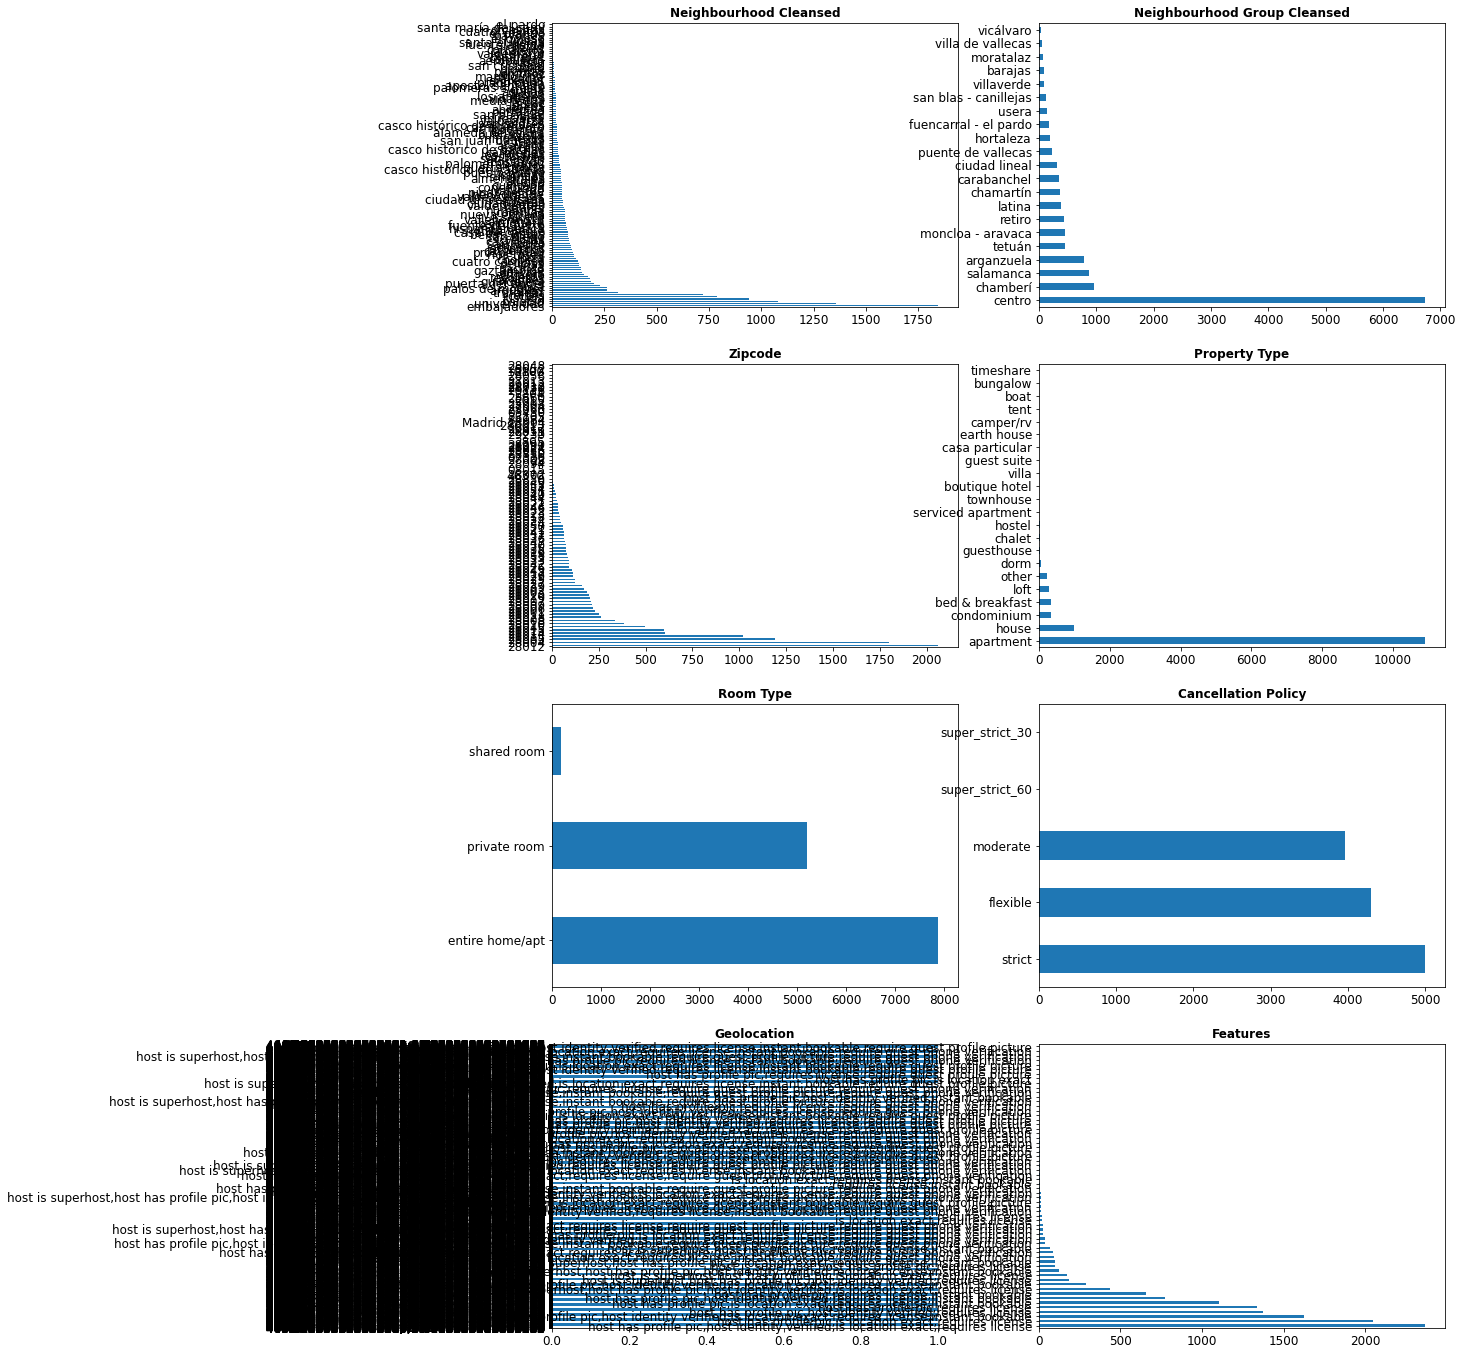

In [15]:
# Para analizar y entender los datos correspondientes a las variables categóricas
graficos_eda_categoricos(df.select_dtypes('O'))

Conclusiones:

* Para las variables categóricas: 
Realizamos filtro por Market = madrid y posteriormente eliminamos la variable Market

* Features tiene información, entre ella si es superhost o no --> Organizarla, rellenar la columna con Superhost para los que contienen el string 'superhost' y Host para los que contienen el string 'host' y así poder analizar esta columna. 

* Neighbourhood Group Cleansed --> imputarlos tras EDA, lo que significa sobreescribir el nulo por un valor que consideremos muy probable para esa variable, se asigna el que probabilísticamente sea mayor para cada una

* Zipcode --> Creamos un dataframe con los datos de 'Neighbourhood Cleansed' y el Zipcode que le corresponde, posteriormente los datos que queden haciendo falta se extraen de geopy.geocoders import Nominatim, creando nuevamente un dataframe con el geolozalizador, el 'Neighbourhood Cleansed' y el Zipcode correctos


In [75]:
# Rellenar la columna con Superhost para superhost o Host para solo Host 
df['Features'] = df['Features'].str.contains('superhost', regex = False)

In [76]:
# Visualizar los cambios
df['Features']

0         True
1        False
2        False
3        False
4         True
         ...  
14766    False
14767     True
14768    False
14769    False
14770    False
Name: Features, Length: 13274, dtype: bool

In [77]:
# Cambiamos los valores de True = Superhost y False = Host
df['Features'] = df['Features'].replace(to_replace= False, value="Host")
df['Features'] = df['Features'].replace(to_replace= True, value="Superhost")

In [78]:
# Visualizar los cambios
df['Features']

0        Superhost
1             Host
2             Host
3             Host
4        Superhost
           ...    
14766         Host
14767    Superhost
14768         Host
14769         Host
14770         Host
Name: Features, Length: 13274, dtype: object

In [79]:
# Analizando esta Columna, vemos que solo tienen un valor nulo, por tal razon, procedemos a anular la fila donde está el valor nulo
df = df[df['Neighbourhood Group Cleansed'].notna()]

In [80]:
# Entender las variables y saber cuantas hay, tipos de datos y valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13273 entries, 0 to 14770
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            13273 non-null  int64  
 1   Host ID                       13273 non-null  int64  
 2   Host Response Rate            11567 non-null  float64
 3   Host Listings Count           13270 non-null  float64
 4   Host Total Listings Count     13270 non-null  float64
 5   Neighbourhood Cleansed        13273 non-null  object 
 6   Neighbourhood Group Cleansed  13273 non-null  object 
 7   Zipcode                       12829 non-null  object 
 8   Latitude                      13273 non-null  float64
 9   Longitude                     13273 non-null  float64
 10  Property Type                 13273 non-null  object 
 11  Room Type                     13273 non-null  object 
 12  Accommodates                  13273 non-null  int64  
 13  B

Debemos Conseguir los Zipcodes correctos

In [81]:
# Agrupo por los valores unicos de la columna 'Neighbourhood Cleansed' con su respectivo Zipcode
nc_zc = df.groupby(df['Neighbourhood Cleansed'].drop_duplicates())['Zipcode'].value_counts()
nc_zc

Neighbourhood Cleansed  Zipcode
abrantes                28025      1
acacias                 28005      1
adelfas                 28007      1
aeropuerto              28042      1
aguilas                 28044      1
                                  ..
vallehermoso            28003      1
valverde                28050      1
vinateros               28030      1
vista alegre            28025      1
zofío                   28026      1
Name: Zipcode, Length: 123, dtype: int64

In [82]:
# Creo el DataFrame con estos valores únicos
v = pd.DataFrame(nc_zc)

# Elimino la columna resultante con el Zipcode =  1
v = v.drop(['Zipcode'], axis=1)

# Paso 'Neighbourhood Cleansed' de índice a columna
v = v.reset_index('Neighbourhood Cleansed')

# Paso 'Zipcode' de índice a columna
v = v.reset_index('Zipcode')

In [83]:
# Visualizo el DF resultante con valores únicos
v

,Zipcode,Neighbourhood Cleansed
0,28025,abrantes
1,28005,acacias
2,28007,adelfas
3,28042,aeropuerto
4,28044,aguilas
...,...,...
118,28003,vallehermoso
119,28050,valverde
120,28030,vinateros
121,28025,vista alegre


In [84]:
# Añado la columna de la lista que se sacó aparte con valores únicos de Neighbourhood Cleansed a una variable
var1 = v['Neighbourhood Cleansed'].tolist()
# Añado la columna de la lista que se sacó aparte con valores únicos de Zipcode a una variable
var2 = v['Zipcode'].tolist()
# Añado la columna del df actual con la lista de Neighbourhood Cleansed a una variable
var3 = df['Neighbourhood Cleansed'].tolist()
# Añado la columna del df actual con la lista de Zipcode a una variable
var4 = df['Zipcode'].tolist()

# lista comprimida donde busco el Zipcode de var2 y si no lo encuentra coloque el zipcode que tenía o sea var4
df['Zipcode'] = [var2[var1.index(x)] if x in var1 else var4[var3.index(x)] if x in var3 else x for x in df['Neighbourhood Cleansed']]

In [85]:
# Asigno las filas donde hay valores nulos
df_aux = df[df['Zipcode'].isna()]
# Verifico si df_aux tiene valores nulos
df_aux

,ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Zipcode,Latitude,Longitude,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Geolocation,Features
174,9773489,50379965,100.0,2.0,2.0,estrella,retiro,NaN,40.418184,-3.668061,...,10.0,10.0,10.0,10.0,10.0,10.0,flexible,0.25,"40.41818398213494, -3.668061388856868",Host
175,17033161,12327161,100.0,2.0,2.0,estrella,retiro,NaN,40.419567,-3.664914,...,10.0,10.0,10.0,10.0,10.0,10.0,flexible,0.71,"40.41956679445455, -3.664913727045007",Host
176,12204859,4424222,100.0,6.0,6.0,estrella,retiro,NaN,40.411875,-3.669571,...,10.0,10.0,10.0,10.0,10.0,10.0,strict,0.78,"40.41187539923416, -3.66957098362788",Host
297,13761034,80679003,100.0,3.0,3.0,ventas,ciudad lineal,NaN,40.425998,-3.657185,...,NaN,NaN,NaN,NaN,NaN,NaN,flexible,NaN,"40.42599781862476, -3.6571846823910414",Host
339,17003150,23092262,NaN,1.0,1.0,peñagrande,fuencarral - el pardo,NaN,40.481103,-3.717869,...,NaN,NaN,NaN,NaN,NaN,NaN,flexible,NaN,"40.481103029211305, -3.717869233210997",Host
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14222,13778954,80679003,100.0,3.0,3.0,ventas,ciudad lineal,NaN,40.428163,-3.647951,...,9.0,9.0,10.0,10.0,8.0,9.0,flexible,0.65,"40.42816287152955, -3.6479510249938594",Host
14223,986924,1714541,100.0,10.0,10.0,ventas,ciudad lineal,NaN,40.421164,-3.652956,...,9.0,9.0,10.0,10.0,8.0,9.0,moderate,1.86,"40.42116398971999, -3.652955519543177",Host
14300,15938590,18069062,NaN,1.0,1.0,estrella,retiro,NaN,40.408052,-3.669394,...,NaN,NaN,NaN,NaN,NaN,NaN,flexible,NaN,"40.408052247101026, -3.669394149754068",Host
14317,15981134,38960344,0.0,1.0,1.0,peñagrande,fuencarral - el pardo,NaN,40.475178,-3.719821,...,NaN,NaN,NaN,NaN,NaN,NaN,moderate,NaN,"40.47517805633361, -3.7198208883110504",Host


In [86]:
# Para evitar contaminar los datos, borro las filas del df original donde falta al menos un elemento.
df = df.dropna(subset=['Zipcode'])

In [87]:
# Lambda es como tener un ciclo for y se le aplica a cada uno de los elementos de la columna
# x es como hacer referencia a cada uno de los renglones o filas

# se establece la conexión con el servidor
geolocator = Nominatim(user_agent = 'Pruebas')

# Traigo los valores que corresponden a cada consulta
df_aux['Zipcode'] = df_aux['Geolocation'].apply(lambda x: geolocator.reverse(x).raw['address']['postcode'])
df_aux['Neighbourhood Cleansed'] = df_aux['Geolocation'].apply(lambda x: geolocator.reverse(x).raw['address']['quarter'])

# Visualizo el df
df_aux

,ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Zipcode,Latitude,Longitude,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Geolocation,Features
174,9773489,50379965,100.0,2.0,2.0,Estrella,retiro,28007,40.418184,-3.668061,...,10.0,10.0,10.0,10.0,10.0,10.0,flexible,0.25,"40.41818398213494, -3.668061388856868",Host
175,17033161,12327161,100.0,2.0,2.0,Estrella,retiro,28007,40.419567,-3.664914,...,10.0,10.0,10.0,10.0,10.0,10.0,flexible,0.71,"40.41956679445455, -3.664913727045007",Host
176,12204859,4424222,100.0,6.0,6.0,Estrella,retiro,28007,40.411875,-3.669571,...,10.0,10.0,10.0,10.0,10.0,10.0,strict,0.78,"40.41187539923416, -3.66957098362788",Host
297,13761034,80679003,100.0,3.0,3.0,Ventas,ciudad lineal,28017,40.425998,-3.657185,...,NaN,NaN,NaN,NaN,NaN,NaN,flexible,NaN,"40.42599781862476, -3.6571846823910414",Host
339,17003150,23092262,NaN,1.0,1.0,Peñagrande,fuencarral - el pardo,28035,40.481103,-3.717869,...,NaN,NaN,NaN,NaN,NaN,NaN,flexible,NaN,"40.481103029211305, -3.717869233210997",Host
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14222,13778954,80679003,100.0,3.0,3.0,Ventas,ciudad lineal,28017,40.428163,-3.647951,...,9.0,9.0,10.0,10.0,8.0,9.0,flexible,0.65,"40.42816287152955, -3.6479510249938594",Host
14223,986924,1714541,100.0,10.0,10.0,Ventas,ciudad lineal,28017,40.421164,-3.652956,...,9.0,9.0,10.0,10.0,8.0,9.0,moderate,1.86,"40.42116398971999, -3.652955519543177",Host
14300,15938590,18069062,NaN,1.0,1.0,Estrella,retiro,28007,40.408052,-3.669394,...,NaN,NaN,NaN,NaN,NaN,NaN,flexible,NaN,"40.408052247101026, -3.669394149754068",Host
14317,15981134,38960344,0.0,1.0,1.0,Peñagrande,fuencarral - el pardo,28035,40.475178,-3.719821,...,NaN,NaN,NaN,NaN,NaN,NaN,moderate,NaN,"40.47517805633361, -3.7198208883110504",Host


In [88]:
# Concateno el df original con aux_filas que en zipcode había NaN
df = pd.concat([df, df_aux])

In [89]:
# Verifico valores de la columna Zipcode del dataframe
pd.unique(df['Zipcode'])

array(['28005', '28004', '28013', '28045', '28007', '28009', '28014',
       '28001', '28028', '28006', '28002', '28016', '28036', '28039',
       '28020', '28060', '28003', '28029', '28015', '28027', '28043',
       '28033', '28055', '28010', '28008', '28021', '28037', '28042',
       '28011', '28047', '28019', '28024', '28044', '28025', '28050',
       '28035', '28038', '28023', '28041', '28026', '28053', '28030',
       '28017', '28051', '28032', '28022', '28018', '28031', '20126',
       '28054', '28049', '28290', '28929'], dtype=object)

In [90]:
# dentro de los Zipcode hay un valor 20126 que no es común. Procedemos a analizarlos
df_aux = df[df['Zipcode'] == '20126']
df = df[df['Zipcode'] != '20126']

In [91]:
# Lambda es como tener un ciclo for y se le aplica a cada uno de los elementos de la columna
# x es como hacer referencia a cada uno de los renglones o filas

# se establece la conexión con el servidor
geolocator = Nominatim(user_agent = 'Pruebas')

# Traigo los valores que corresponden a cada consulta
df_aux['Zipcode'] = df_aux['Geolocation'].apply(lambda x: geolocator.reverse(x).raw['address']['postcode'])
df_aux['Neighbourhood Cleansed'] = df_aux['Geolocation'].apply(lambda x: geolocator.reverse(x).raw['address']['quarter'])

# Visualizo el df
df_aux

,ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Zipcode,Latitude,Longitude,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Geolocation,Features
2049,6710942,35133099,100.0,1.0,1.0,Moscardó,usera,28026,40.390085,-3.701832,...,10.0,10.0,10.0,10.0,9.0,10.0,moderate,1.18,"40.39008479454202, -3.7018324590299336",Host
2531,17891989,121517372,100.0,1.0,1.0,Moscardó,usera,28026,40.389052,-3.700125,...,NaN,NaN,NaN,NaN,NaN,NaN,flexible,NaN,"40.38905209370261, -3.7001249872533415",Host
2786,14597062,72628929,90.0,1.0,1.0,Moscardó,usera,28026,40.390104,-3.700066,...,10.0,10.0,10.0,10.0,10.0,10.0,flexible,0.79,"40.3901042632535, -3.700065697749856",Host
3617,6489124,8204242,100.0,3.0,3.0,Moscardó,usera,28026,40.392075,-3.701422,...,10.0,10.0,10.0,10.0,9.0,10.0,moderate,4.60,"40.392075132194904, -3.70142203355441",Host
3965,9215075,17198012,100.0,1.0,1.0,Moscardó,usera,28026,40.389829,-3.708485,...,10.0,10.0,10.0,10.0,9.0,10.0,strict,3.46,"40.38982871334147, -3.7084846029966605",Host
4824,8235473,9492487,0.0,6.0,6.0,Moscardó,usera,28019,40.389383,-3.712124,...,4.0,6.0,2.0,8.0,8.0,6.0,strict,0.06,"40.38938279140819, -3.712124104009769",Host
5316,16375547,107257008,60.0,1.0,1.0,Moscardó,usera,28026,40.392178,-3.702214,...,NaN,NaN,NaN,NaN,NaN,NaN,strict,NaN,"40.39217779799927, -3.7022135754807253",Host
5317,11050061,57351353,100.0,0.0,0.0,Moscardó,usera,28026,40.387833,-3.700810,...,9.0,9.0,8.0,9.0,7.0,8.0,flexible,0.15,"40.387833428538435, -3.7008101687193897",Host
5643,17969026,21485458,98.0,46.0,46.0,Moscardó,usera,28026,40.385668,-3.711540,...,NaN,NaN,NaN,NaN,NaN,NaN,moderate,NaN,"40.385668192101456, -3.71153953740162",Host
6552,8481449,44666426,100.0,1.0,1.0,Moscardó,usera,28026,40.385572,-3.712345,...,10.0,10.0,10.0,10.0,9.0,10.0,flexible,5.29,"40.38557244506162, -3.7123446971104324",Superhost


In [92]:
# Verifico nuevamente los valores únicos de los Zipcode, donde puedo totalmente segurar que los Zipcode están correctos
df = pd.concat([df, df_aux])
pd.unique(df['Zipcode'])

array(['28005', '28004', '28013', '28045', '28007', '28009', '28014',
       '28001', '28028', '28006', '28002', '28016', '28036', '28039',
       '28020', '28060', '28003', '28029', '28015', '28027', '28043',
       '28033', '28055', '28010', '28008', '28021', '28037', '28042',
       '28011', '28047', '28019', '28024', '28044', '28025', '28050',
       '28035', '28038', '28023', '28041', '28026', '28053', '28030',
       '28017', '28051', '28032', '28022', '28018', '28031', '28054',
       '28049', '28290', '28929'], dtype=object)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13273 entries, 0 to 14678
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            13273 non-null  int64  
 1   Host ID                       13273 non-null  int64  
 2   Host Response Rate            11567 non-null  float64
 3   Host Listings Count           13270 non-null  float64
 4   Host Total Listings Count     13270 non-null  float64
 5   Neighbourhood Cleansed        13273 non-null  object 
 6   Neighbourhood Group Cleansed  13273 non-null  object 
 7   Zipcode                       13273 non-null  object 
 8   Latitude                      13273 non-null  float64
 9   Longitude                     13273 non-null  float64
 10  Property Type                 13273 non-null  object 
 11  Room Type                     13273 non-null  object 
 12  Accommodates                  13273 non-null  int64  
 13  B

#### EDA VARIABLES NUMÉRICAS

In [94]:
# Como son números, procedemos a realizar análisis estadísticos de los datos
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [95]:
# Visulizo la función estadística y redondeo valores a 2 decimales
round(estadisticos_cont(df.select_dtypes('number')),2)

,count,mean,median,std,min,25%,50%,75%,max
ID,13273.0,10424118.37,11550179.00,5524681.63,18628.00,5831352.00,11550179.00,15394829.00,1.810984e+07
Host ID,13273.0,37628669.58,27526991.00,34666914.53,17453.00,7769152.00,27526991.00,57631899.00,1.247534e+08
Host Response Rate,11567.0,94.79,100.00,15.34,0.00,100.00,100.00,100.00,1.000000e+02
Host Listings Count,13270.0,9.72,2.00,27.81,0.00,1.00,2.00,5.00,5.190000e+02
Host Total Listings Count,13270.0,9.72,2.00,27.81,0.00,1.00,2.00,5.00,5.190000e+02
Latitude,13273.0,40.42,40.42,0.02,40.33,40.41,40.42,40.43,4.056000e+01
Longitude,13273.0,-3.70,-3.70,0.02,-3.86,-3.71,-3.70,-3.69,-3.530000e+00
Accommodates,13273.0,3.18,2.00,1.99,1.00,2.00,2.00,4.00,1.600000e+01
Bathrooms,13223.0,1.25,1.00,0.60,0.00,1.00,1.00,1.00,8.000000e+00
Bedrooms,13250.0,1.30,1.00,0.82,0.00,1.00,1.00,2.00,1.000000e+01


In [96]:
# Nuevamente se hace un conteo de los nulos que tiene cada una de las variables y se ordena en descendente
df.isna().sum().sort_values(ascending = False)

Monthly Price                   9950
Weekly Price                    9908
Review Scores Value             2912
Review Scores Location          2912
Review Scores Checkin           2910
Review Scores Accuracy          2901
Review Scores Cleanliness       2895
Review Scores Communication     2895
Review Scores Rating            2883
Reviews per Month               2762
Host Response Rate              1706
Bathrooms                         50
Beds                              49
Bedrooms                          23
Price                              9
Host Total Listings Count          3
Host Listings Count                3
Cancellation Policy                0
Maximum Nights                     0
Geolocation                        0
Number of Reviews                  0
ID                                 0
Minimum Nights                     0
Extra People                       0
Guests Included                    0
Host ID                            0
Accommodates                       0
R

Conclusiones:

* Weekly Price tienen demasiados nulos --> Multiplicar Price por 7
* Monthly Price tienen demasiados nulos --> Multiplicar Price por 30
* Price tiene 9 datos nulos --> Anular las filas donde hay datos nulos

In [97]:
# Necesitamos garantizar que los valores por el alojamiento son datos reales. Después de analizar esta columna, nos damos
# Cuenta que tiene 9 filas con datos nulos y que a su vez estas filas tienen faltantes de datos en otras columnas, se 
# toma la desición de anular estas filas
df = df[df['Price'].notna()]

In [99]:
# Nuevamente se hace un conteo de los nulos que tiene cada una de las variables y se ordena en descendente
df.isna().sum().sort_values(ascending = False)

Monthly Price                   9944
Weekly Price                    9901
Review Scores Value             2906
Review Scores Location          2906
Review Scores Checkin           2904
Review Scores Accuracy          2895
Review Scores Cleanliness       2889
Review Scores Communication     2889
Review Scores Rating            2877
Reviews per Month               2756
Host Response Rate              1704
Bathrooms                         49
Beds                              48
Bedrooms                          23
Host Total Listings Count          3
Host Listings Count                3
Cancellation Policy                0
Minimum Nights                     0
Geolocation                        0
Number of Reviews                  0
Maximum Nights                     0
ID                                 0
Extra People                       0
Guests Included                    0
Host ID                            0
Price                              0
Accommodates                       0
R

In [100]:
# Verifico la información
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13264 entries, 0 to 14678
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            13264 non-null  int64  
 1   Host ID                       13264 non-null  int64  
 2   Host Response Rate            11560 non-null  float64
 3   Host Listings Count           13261 non-null  float64
 4   Host Total Listings Count     13261 non-null  float64
 5   Neighbourhood Cleansed        13264 non-null  object 
 6   Neighbourhood Group Cleansed  13264 non-null  object 
 7   Zipcode                       13264 non-null  object 
 8   Latitude                      13264 non-null  float64
 9   Longitude                     13264 non-null  float64
 10  Property Type                 13264 non-null  object 
 11  Room Type                     13264 non-null  object 
 12  Accommodates                  13264 non-null  int64  
 13  B

In [101]:
# Hago la imputación de nulos para las variables
df['Review Scores Value'] = df['Review Scores Value'].fillna(round(df['Review Scores Value'].median()))
df['Review Scores Location'] = df['Review Scores Location'].fillna(round(df['Review Scores Location'].median()))
df['Review Scores Checkin'] = df['Review Scores Checkin'].fillna(round(df['Review Scores Checkin'].median()))
df['Review Scores Accuracy'] = df['Review Scores Accuracy'].fillna(round(df['Review Scores Accuracy'].median()))
df['Review Scores Communication'] = df['Review Scores Communication'].fillna(round(df['Review Scores Communication'].median()))
df['Review Scores Cleanliness'] = df['Review Scores Cleanliness'].fillna(round(df['Review Scores Cleanliness'].median()))
df['Review Scores Rating'] = df['Review Scores Rating'].fillna(round(df['Review Scores Rating'].median()))
df['Reviews per Month'] = df['Reviews per Month'].fillna(round(df['Reviews per Month'].median()))
df['Host Response Rate'] = df['Host Response Rate'].fillna(round(df['Host Response Rate'].median()))
df['Bathrooms'] = df['Bathrooms'].fillna(round(df['Bathrooms'].median()))
df['Beds'] = df['Beds'].fillna(round(df['Beds'].median()))
df['Bedrooms'] = df['Bedrooms'].fillna(round(df['Bedrooms'].median()))
df['Host Total Listings Count'] = df['Host Total Listings Count'].fillna(round(df['Host Total Listings Count'].median()))
df['Host Listings Count'] = df['Host Listings Count'].fillna(round(df['Host Listings Count'].median()))

In [102]:
# Una vez se imputan los datos de Price, procedo a operar los datos de las variables Weekly Price y Monthly Price

# Como los datos de estas dos variable tienen muchos datos Nulos, se corrige, 
# multiplicando el precio por la cantidad de días según corresponda 
df['Weekly Price'] = (df['Price'] * 7)
df['Monthly Price'] = (df['Price'] * 30)

In [103]:
# Nuevamente se hace un conteo de los nulos que tiene cada una de las variables y se ordena en descendente
df.isna().sum().sort_values(ascending = False)

ID                              0
Review Scores Cleanliness       0
Extra People                    0
Minimum Nights                  0
Maximum Nights                  0
Number of Reviews               0
Review Scores Rating            0
Review Scores Accuracy          0
Review Scores Checkin           0
Monthly Price                   0
Review Scores Communication     0
Review Scores Location          0
Review Scores Value             0
Cancellation Policy             0
Reviews per Month               0
Geolocation                     0
Guests Included                 0
Weekly Price                    0
Host ID                         0
Latitude                        0
Host Response Rate              0
Host Listings Count             0
Host Total Listings Count       0
Neighbourhood Cleansed          0
Neighbourhood Group Cleansed    0
Zipcode                         0
Longitude                       0
Price                           0
Property Type                   0
Room Type     

In [104]:
# Corregimos el tipo de variables en las que el dato es entero y aparece como float
df['Host Response Rate'] = df['Host Response Rate'].astype(int)
df['Host Listings Count'] = df['Host Listings Count'].astype(int)
df['Host Total Listings Count'] = df['Host Total Listings Count'].astype(int)
df['Bathrooms'] = df['Bathrooms'].astype(int)
df['Bedrooms'] = df['Bedrooms'].astype(int)
df['Beds'] = df['Beds'].astype(int)
df['Price'] = df['Price'].astype(int)
df['Weekly Price'] = df['Weekly Price'].astype(int)
df['Monthly Price'] = df['Monthly Price'].astype(int)
df['Review Scores Rating'] = df['Review Scores Rating'].astype(int)
df['Review Scores Accuracy'] = df['Review Scores Accuracy'].astype(int)
df['Review Scores Cleanliness'] = df['Review Scores Cleanliness'].astype(int)
df['Review Scores Checkin'] = df['Review Scores Checkin'].astype(int)
df['Review Scores Communication'] = df['Review Scores Communication'].astype(int)
df['Review Scores Location'] = df['Review Scores Location'].astype(int)
df['Review Scores Value'] = df['Review Scores Value'].astype(int)

In [105]:
# Se expande la variable Geolocation en dos variables
name = df["Geolocation"].str.split(expand=True)
name.columns = ['first_Latitude', 'last_Longitude']

# Se asignan estos valores a las variables Latitude y Longitude respectivamente
df['Latitude'] = name['first_Latitude']
df['Longitude'] = name['last_Longitude']

# Reemplazo las comas con las que queda la variable Latitude por vacío para que no se afecte el dato
df['Latitude'] = df['Latitude'].replace(to_replace=r',', value='', regex=True)

In [106]:
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13264 entries, 0 to 14678
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            13264 non-null  int64  
 1   Host ID                       13264 non-null  int64  
 2   Host Response Rate            13264 non-null  int64  
 3   Host Listings Count           13264 non-null  int64  
 4   Host Total Listings Count     13264 non-null  int64  
 5   Neighbourhood Cleansed        13264 non-null  object 
 6   Neighbourhood Group Cleansed  13264 non-null  object 
 7   Zipcode                       13264 non-null  object 
 8   Latitude                      13264 non-null  float64
 9   Longitude                     13264 non-null  float64
 10  Property Type                 13264 non-null  object 
 11  Room Type                     13264 non-null  object 
 12  Accommodates                  13264 non-null  int64  
 13  B

In [108]:
# Creamos Un nuevo dataset con los datos limpios
df.to_csv('airbnb-listings_clean.csv', sep=';', index=False)

### GENERACIÓN DE INSIGHTS

### Cuantificación del problema: ¿Tipos de anfitriones y precios?

In [109]:
# Se hace un conteo de frecuencia de Host/Superhost y me lo devuelve en forma de porcentaje
sh = df.Features.value_counts(normalize = True) * 100
print(f'Superhost:\t{round(sh[1],2)}%\nHost:\t\t{round(sh[0],2)}%')

Superhost:	11.72%
Host:		88.28%


Text(0.5, 1.0, 'Features\n\nSuperhost: 1554\nHost: 11710')

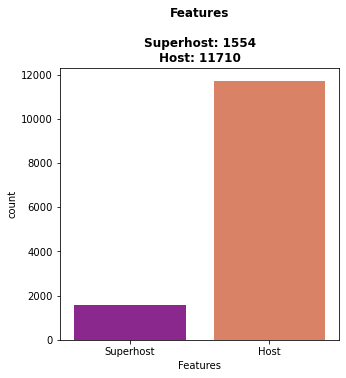

In [110]:
# Análisis tipo de Anfitrión
cant = df.groupby('Features').size()
ar = pd.unique(cant)

# df.groupby('Features') = Agrupa si es superhost o no
# para cada valor de esa variable Price.mean() hace la media del precio
data = df['Features']

sns.countplot(x = data, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title(f'Features\n\nSuperhost: {ar[1]}\nHost: {ar[0]}', fontweight ="bold")


# ¿El valor del alquiler, depende de la ubicacion del host y del tipo de anfitrión?

In [114]:
# Se analiza la ubicación del host por Price, Zipcode, tipo de host y tipo de anfitrión, mientras más grande el circulo, más alto es el valor

df.dropna(
    axis=0,
    how='any',
    #thresh=None,
    subset=None,
    inplace=True
)

color_scale = [(0, 'blue'), (1,'red')]

fig = px.scatter_mapbox(df, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Price", 
                        hover_data=["Price", "Zipcode", "Property Type", "Neighbourhood Cleansed", "Features"],
                        color="Price",
                        color_continuous_scale=color_scale,
                        size="Price",
                        zoom=10, 
                        height=500,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [125]:
# El precio medio por barrio
p = 'Barrio        ║   Precio Promedio'
bar = '='*len(p)
print(f'{bar}\n{p}\n{bar}')
df.groupby('Neighbourhood Cleansed').Price.mean().round(2).sort_values(ascending = False)

Barrio        ║   Precio Promedio


Neighbourhood Cleansed
fuentelareina           239.00
el plantío              221.25
el goloso               202.75
ciudad universitaria    174.96
valdemarín              155.83
                         ...  
ambroz                   21.83
cuatro vientos           21.33
orcasitas                18.50
rosas                    17.50
Pueblo Nuevo             16.00
Name: Price, Length: 130, dtype: float64

Text(0.5, 1.0, 'Precio x Barrio\n ')

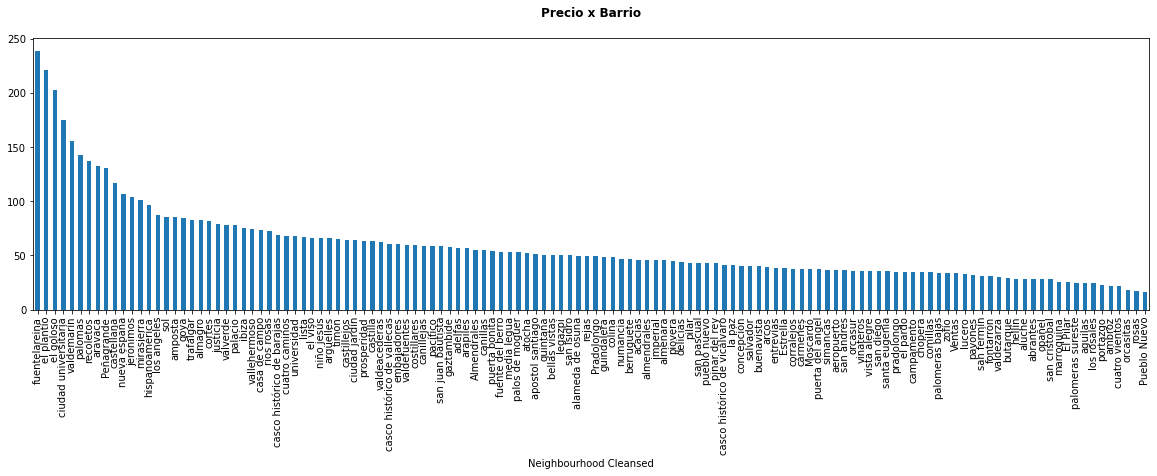

In [136]:
# Análisis de precio por barrio
data = df.groupby('Neighbourhood Cleansed').Price.mean().sort_values(ascending = False)
data.plot.bar()
fig = plt.gcf()
fig.set_size_inches(20,5)
plt.title(f'Precio x Barrio\n ', fontweight ="bold")

Text(0.5, 1.0, 'Precio x Distrito\n ')

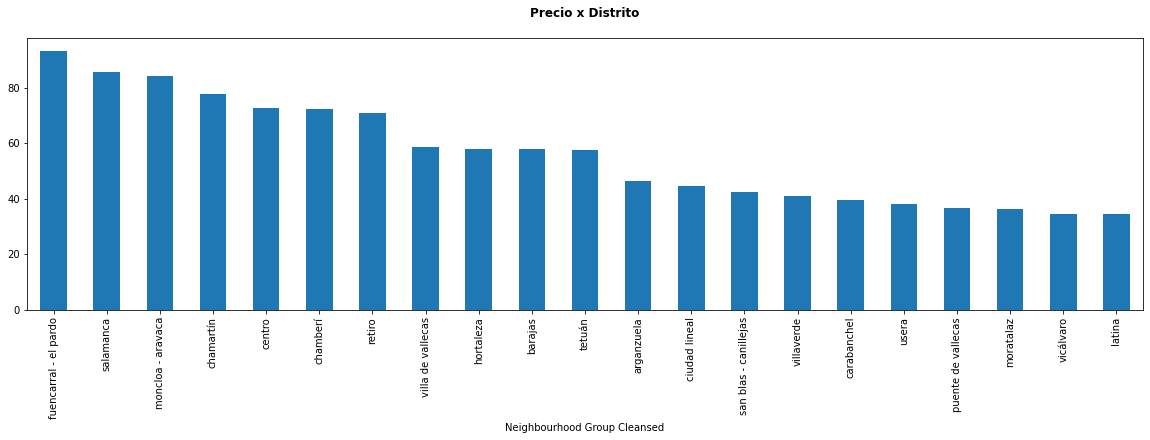

In [137]:
# Análisis de precio por distrito
data = df.groupby('Neighbourhood Group Cleansed').Price.mean().sort_values(ascending = False)
data.plot.bar()
fig = plt.gcf()
fig.set_size_inches(20,5)
plt.title(f'Precio x Distrito\n ', fontweight ="bold")

Text(0.5, 1.0, 'Host Response Rate x Host/Superhost\n ')

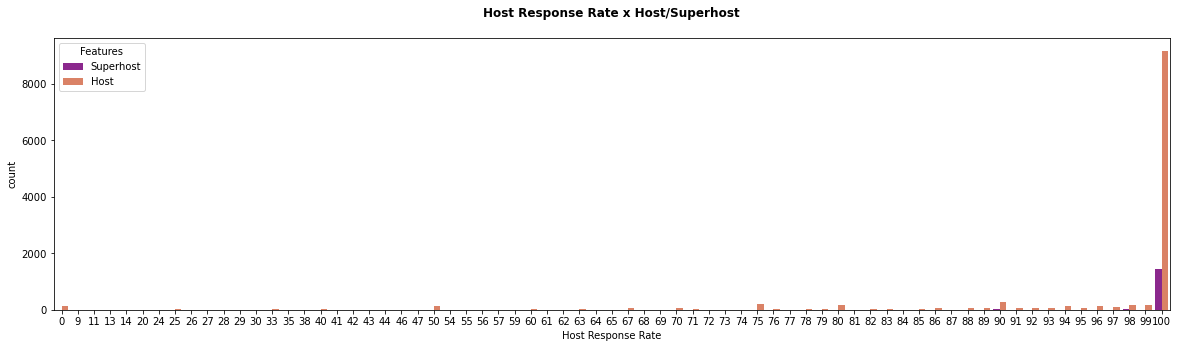

In [139]:
# Análisis de ratio de respuesta por tipo de host
data = df['Host Response Rate']
group = df['Features']
sns.countplot(x = data, hue = group, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(20,5)
plt.title(f'Host Response Rate x Host/Superhost\n ', fontweight ="bold")

In [140]:
# Análisis de ratio de respuesta por tipo de Anfitrión
# Separamos los datos que son Host 
h = df['Features'] == 'Host'
# Agrupamos los datos que son Host por 'Host Response Rate' 
ho = df[h].groupby('Host Response Rate')['Features'].size()
# Separamos los datos que son Superhost
sh = df['Features'] == 'Superhost'
# Agrupamos los datos que son Superhost por 'Host Response Rate'
suho = df[sh].groupby('Host Response Rate')['Features'].size()

In [141]:
# Cantidad de ratios de respuesta de Host
p = 'Ratio ║Cantidad Host'
bar = '='*len(p)
print(f'{bar}\n{p}\n{bar}')
ho

Ratio ║Cantidad Host


Host Response Rate
0       139
9         3
11        2
13        2
14        1
       ... 
96      135
97       87
98      159
99      153
100    9168
Name: Features, Length: 66, dtype: int64

In [142]:
# Cantidad de ratios de respuesta de Superhost
p = 'Ratio ║Cantidad Superhost'
bar = '='*len(p)
print(f'{bar}\n{p}\n{bar}')
suho

Ratio ║Cantidad Superhost


Host Response Rate
0         2
11        1
24        1
27        2
33        2
40        2
41        1
47        2
50        2
60        7
64        1
67        1
70        2
73        1
75        5
80        4
83        7
85        1
86        4
87        3
88        4
89        3
90       25
92        7
93        3
94        4
95        4
96        2
98       15
99        8
100    1428
Name: Features, dtype: int64

Text(0.5, 1.0, 'Número de alojamientos en cada barrio\n')

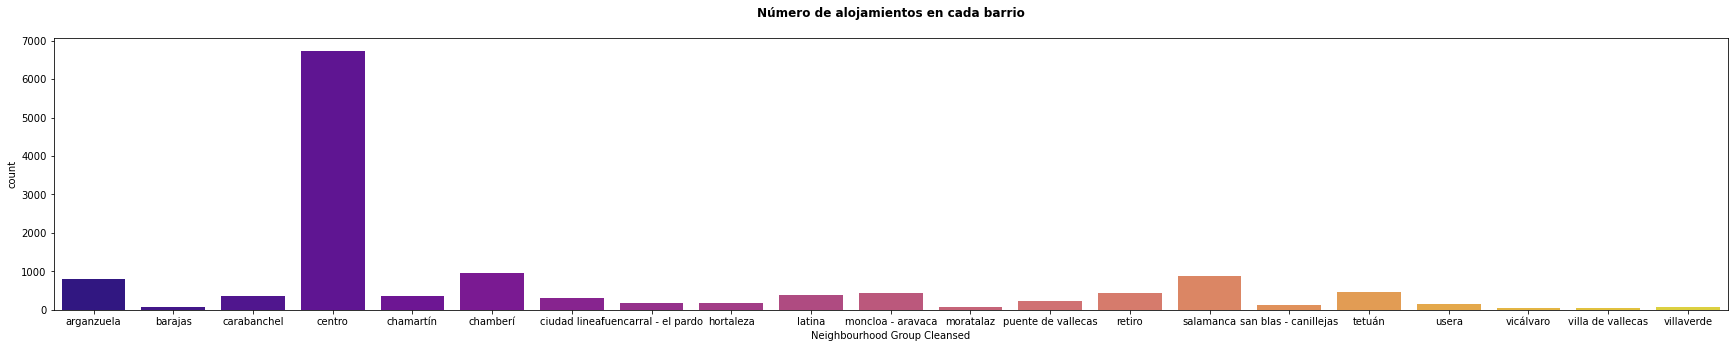

In [143]:
# Análisis de Neighbourhood Group Cleansed por cantidad
 
data = df['Neighbourhood Group Cleansed'].sort_values(ascending = True)
d = data.value_counts()

sns.countplot(x = data, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(30,5)
plt.title(f'Número de alojamientos en cada barrio\n', fontweight ="bold")

In [144]:
# Se analizan los diferentes Grupo de Vecinos Limpiado agrupados con su respectiva cantidad
p = 'Distrito       ║    Cantidad Alojamientos'
bar = '='*len(p)
print(f'{bar}\n{p}\n{bar}')
d

Distrito       ║    Cantidad Alojamientos


centro                   6735
chamberí                  957
salamanca                 876
arganzuela                791
tetuán                    461
moncloa - aravaca         447
retiro                    436
latina                    378
chamartín                 359
carabanchel               358
ciudad lineal             309
puente de vallecas        220
hortaleza                 186
fuencarral - el pardo     170
usera                     145
san blas - canillejas     118
villaverde                 83
barajas                    81
moratalaz                  74
villa de vallecas          46
vicálvaro                  34
Name: Neighbourhood Group Cleansed, dtype: int64

Text(0.5, 1.0, 'Property Type\n')

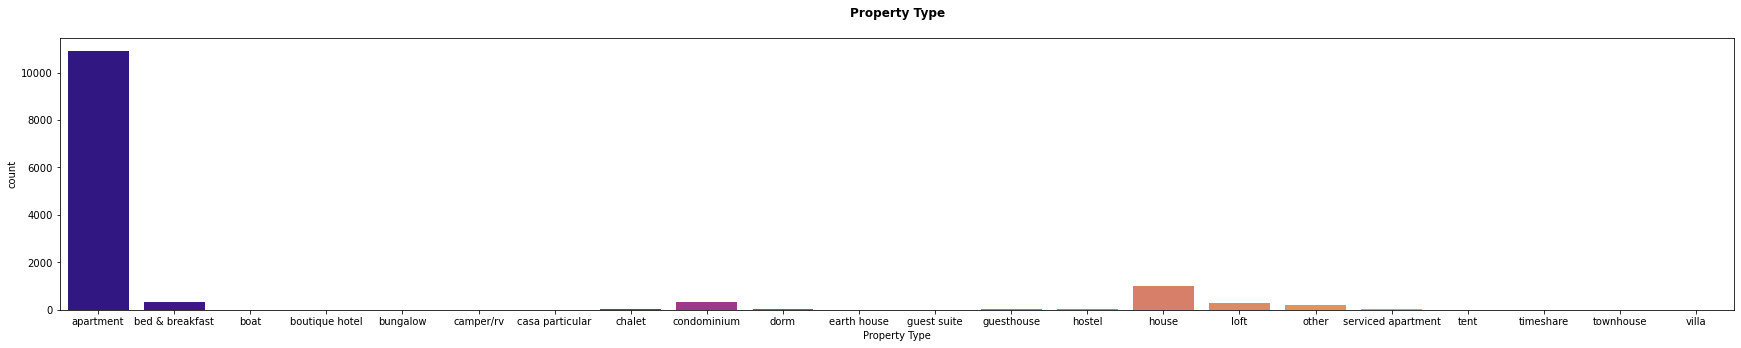

In [145]:
# Análisis del tipo de propiedad por cantidad
 
data = df['Property Type'].sort_values(ascending = True)
d = data.value_counts()

sns.countplot(x = data, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(30,5)
plt.title(f'Property Type\n', fontweight ="bold")

In [146]:
# Se analizan el tipo de propiedad por cantidad
p = 'Propiedad       ║    Cantidad'
bar = '='*len(p)
print(f'{bar}\n{p}\n{bar}')
d

Propiedad       ║    Cantidad


apartment             10910
house                   999
condominium             343
bed & breakfast         339
loft                    284
other                   220
dorm                     44
guesthouse               39
chalet                   23
hostel                   16
serviced apartment       13
townhouse                 9
boutique hotel            6
villa                     4
earth house               3
casa particular           3
guest suite               3
camper/rv                 2
bungalow                  1
tent                      1
timeshare                 1
boat                      1
Name: Property Type, dtype: int64

Text(0.5, 1.0, 'Room Type\n')

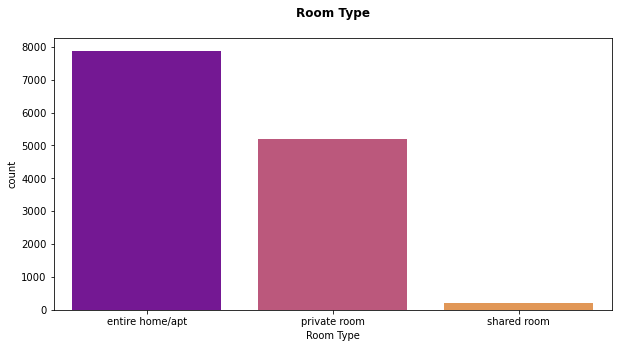

In [147]:
# Análisis del tipo de habitación por cantidad
 
data = df['Room Type'].sort_values(ascending = True)
d = data.value_counts()

sns.countplot(x = data, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title(f'Room Type\n', fontweight ="bold")

In [148]:
# Se analizan del tipo de habitación por cantidad
p = 'Tipo Habitación ║  Cantidad Vivienda'
bar = '='*len(p)
print(f'{bar}\n{p}\n{bar}')
d

Tipo Habitación ║  Cantidad Vivienda


entire home/apt    7875
private room       5197
shared room         192
Name: Room Type, dtype: int64

Text(0.5, 1.0, 'Accommodates\n')

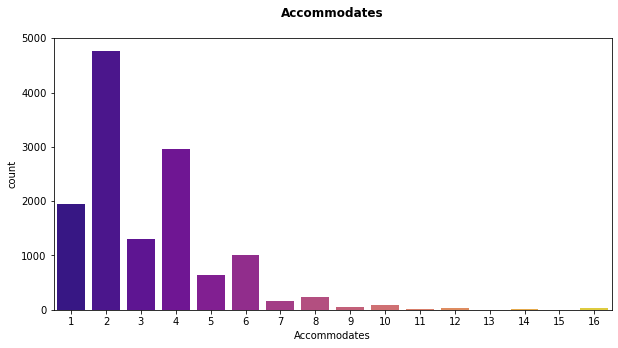

In [149]:
# Análisis acomodación por cantidad
data = df['Accommodates'].sort_values(ascending = True)
d = data.value_counts()

sns.countplot(x = data, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title(f'Accommodates\n', fontweight ="bold")

<AxesSubplot:xlabel='Accommodates'>

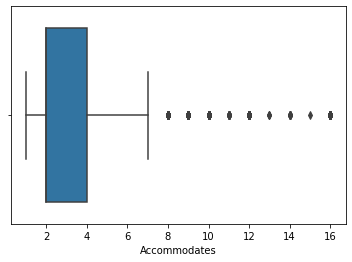

In [150]:
# Análisis Acomodación por cantidad, se evidencian valores atipicos de 7 personas en adelante
sns.boxplot(data=df, x="Accommodates")

In [151]:
# Se analiza la acomodación por cantidad
p = 'Cantidad ║ X vivienda'
bar = '='*len(p)
print(f'{bar}\n{p}\n{bar}')
d

Cantidad ║ X vivienda


2     4766
4     2968
1     1944
3     1296
6     1015
5      637
8      237
7      162
10      89
9       49
12      39
16      32
11      16
14      10
13       3
15       1
Name: Accommodates, dtype: int64

Text(0.5, 1.0, 'Bathrooms\n')

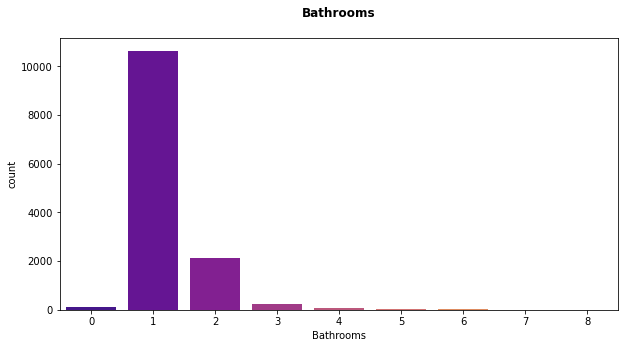

In [152]:
# Se analiza la cantidad de baños de cada alojamiento
 
data = df['Bathrooms'].sort_values(ascending = True)
d = data.value_counts()

sns.countplot(x = data, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title(f'Bathrooms\n', fontweight ="bold")

<AxesSubplot:xlabel='Bathrooms'>

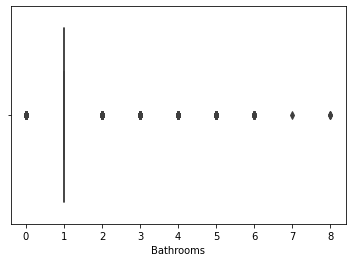

In [153]:
# Análisis de valores atípicos para los baños
sns.boxplot(data=df, x="Bathrooms")

In [155]:
# Se analiza la cantidad de baños cada viviendas
p = 'Baños ║ cada alojamiento'
bar = '='*len(p)
print(f'{bar}\n{p}\n{bar}')
d

Baños ║ cada alojamiento


1    10631
2     2125
3      251
0      127
4       59
5       46
6       21
8        3
7        1
Name: Bathrooms, dtype: int64

Text(0.5, 1.0, 'Bedrooms\n')

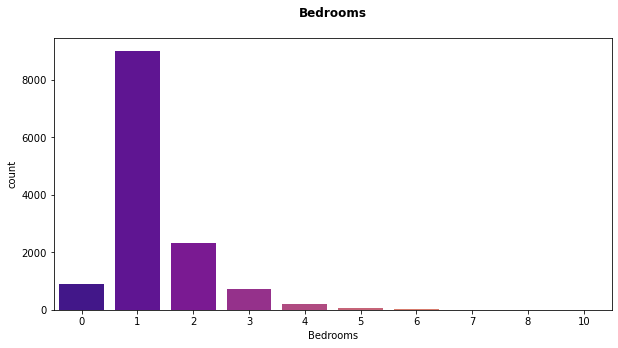

In [156]:
# Se analiza la cantidad de habitaciones para cada alojamiento
 
data = df['Bedrooms'].sort_values(ascending = True)
d = data.value_counts()

sns.countplot(x = data, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title(f'Bedrooms\n', fontweight ="bold")

<AxesSubplot:xlabel='Bedrooms'>

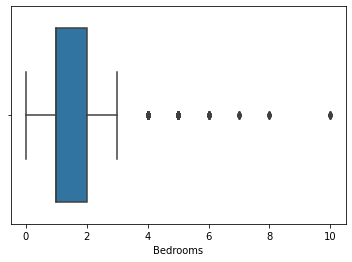

In [157]:
# Análisis de valores atípicos para las habitaciones
sns.boxplot(data=df, x="Bedrooms")

In [158]:
# Se analiza la cantidad de habitaciones para los alojamientos
p = 'Cantidad H ║ X Vivienda'
bar = '='*len(p)
print(f'{bar}\n{p}\n{bar}')
d

Cantidad H ║ X Vivienda


1     9009
2     2333
0      902
3      737
4      197
5       53
6       16
7        6
10       6
8        5
Name: Bedrooms, dtype: int64

Text(0.5, 1.0, 'Beds\n')

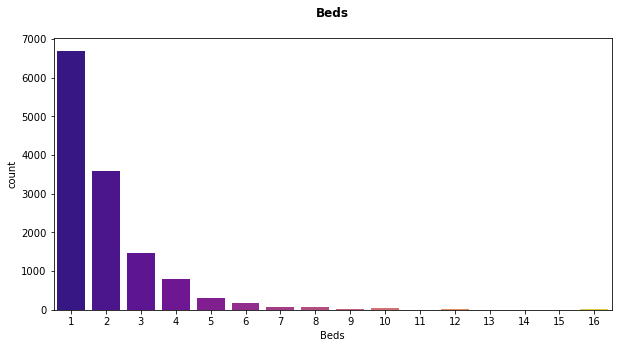

In [159]:
# Se analiza la cantidad de camas por cada viviendas
 
data = df['Beds'].sort_values(ascending = True)
d = data.value_counts()

sns.countplot(x = data, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title(f'Beds\n', fontweight ="bold")

<AxesSubplot:xlabel='Beds'>

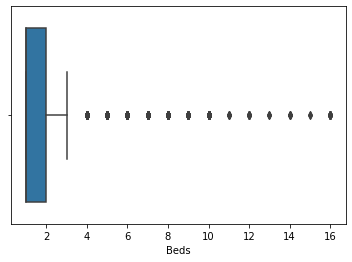

In [160]:
# Análisis de valores atípicos para las camas
sns.boxplot(data=df, x="Beds")

In [162]:
# Se analiza la cantidad de camas por cada alojamiento
p = 'Cant Camas║ Cada alojamiento'
bar = '='*len(p)
print(f'{bar}\n{p}\n{bar}')
d

Cant Camas║ Cada alojamiento


1     6689
2     3577
3     1470
4      804
5      313
6      177
7       67
8       62
10      39
9       28
16      14
12       9
11       5
14       5
13       3
15       2
Name: Beds, dtype: int64

Text(0.5, 1.0, 'Guests Included\n')

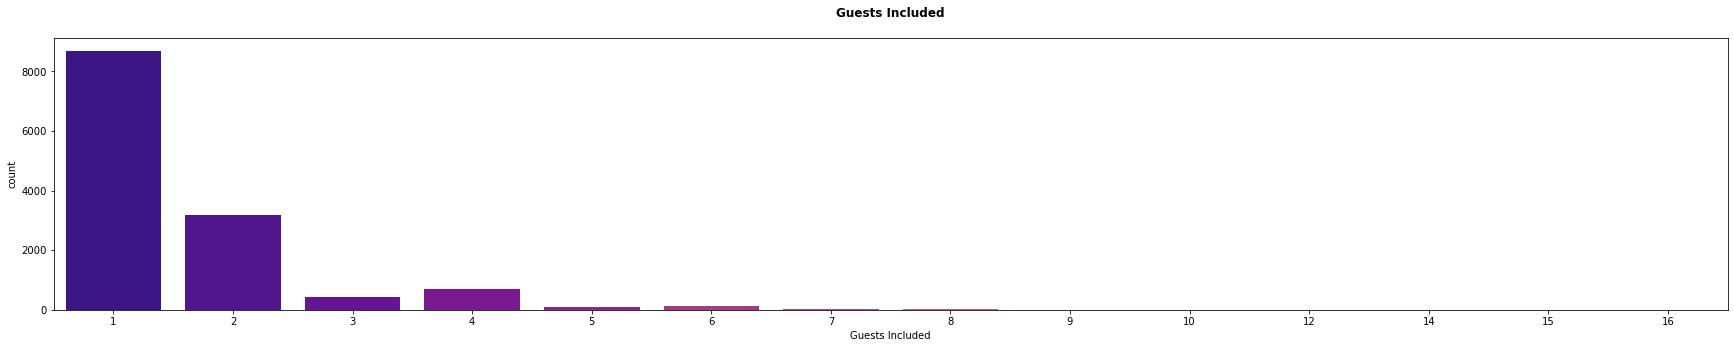

In [164]:
# Se analiza huéspedes incluidos
 
data = df['Guests Included'].sort_values(ascending = True)
d = data.value_counts()

sns.countplot(x = data, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(30,5)
plt.title(f'Guests Included\n', fontweight ="bold")

<AxesSubplot:xlabel='Guests Included'>

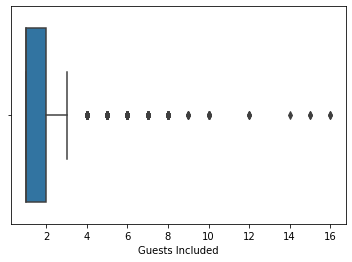

In [165]:
# Análisis de valores invitados incluidos
sns.boxplot(data=df, x="Guests Included")

In [167]:
# Se analiza el numero de invitados incluidos
p = 'Cantidad Inv ║ Cada alojamiento'
bar = '='*len(p)
print(f'{bar}\n{p}\n{bar}')
d

Cantidad Inv ║ Cada alojamiento


1     8687
2     3185
4      687
3      413
6      120
5       98
7       27
8       27
10       8
9        4
12       3
15       2
16       2
14       1
Name: Guests Included, dtype: int64

Text(0.5, 1.0, 'Extra People\n')

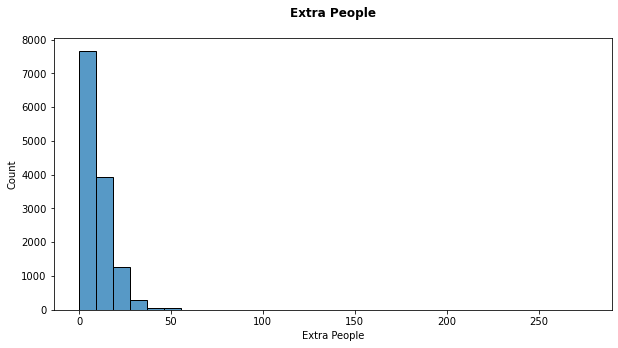

In [168]:
# Se analiza la variable Extra People
data = df['Extra People']
d = df.groupby('Extra People').size()

sns.histplot(x = data, bins=30)
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title(f'Extra People\n', fontweight ="bold")

<AxesSubplot:xlabel='Extra People'>

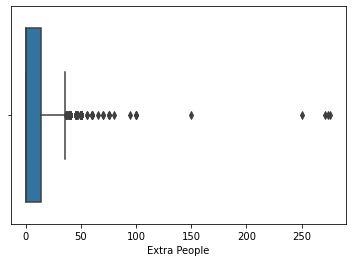

In [169]:
# Se analiza la variable Extra People
sns.boxplot(data=df, x="Extra People")

In [170]:
# Se analiza la variable Extra People
df['Extra People'].describe()

count    13264.000000
mean         7.363163
std         10.354311
min          0.000000
25%          0.000000
50%          0.000000
75%         14.000000
max        276.000000
Name: Extra People, dtype: float64

Text(0.5, 1.0, 'Minimum Nights\n')

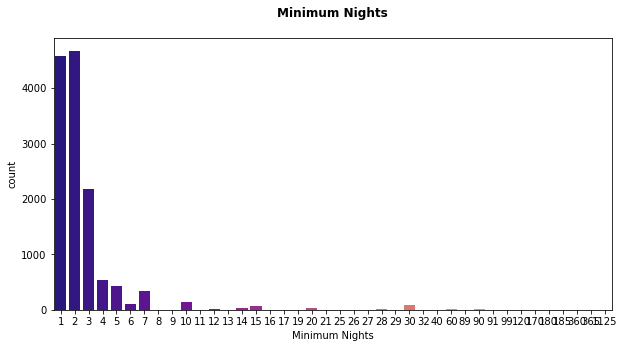

In [171]:
# Se analiza el mínimo de noches para poder reservar el alojamiento
data = df['Minimum Nights']
d = data.value_counts()

sns.countplot(x = data, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title(f'Minimum Nights\n', fontweight ="bold")

<AxesSubplot:xlabel='Minimum Nights'>

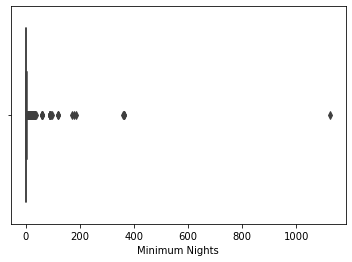

In [172]:
# Se analiza mínimo de noches
sns.boxplot(data=df, x="Minimum Nights")

In [174]:
# Se analiza mínimo de noches
df['Minimum Nights'].describe()

count    13264.000000
mean         3.013194
std         12.860689
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max       1125.000000
Name: Minimum Nights, dtype: float64

In [179]:
# Se analiza el mínimo de noches por cantidad de alojamiento
p = 'Mínimo Noche ║ Cada alojamiento'
bar = '='*len(p)
print(f'{bar}\n{p}\n{bar}')
d

Mínimo Noche ║ Cada alojamiento


1125    9379
30       576
365      447
15       255
7        246
        ... 
44         1
720        1
619        1
38         1
41         1
Name: Maximum Nights, Length: 163, dtype: int64

Text(0.5, 1.0, 'Maximum Nights\n')

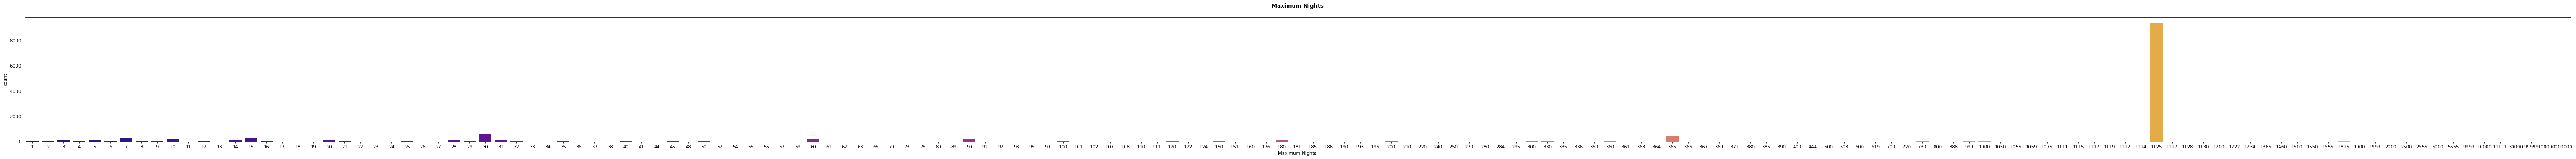

In [177]:
# Se analiza máximo de noches
data = df['Maximum Nights']
d = data.value_counts()

sns.countplot(x = data, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(100,5)
plt.title(f'Maximum Nights\n', fontweight ="bold")

<AxesSubplot:xlabel='Maximum Nights'>

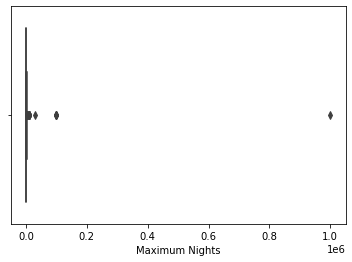

In [178]:
# Se analiza máximo de noches
sns.boxplot(data=df, x="Maximum Nights")

In [638]:
df['Maximum Nights'].describe()

count      13264.000000
mean         959.970371
std         8906.811200
min            1.000000
25%          365.000000
50%         1125.000000
75%         1125.000000
max      1000000.000000
Name: Maximum Nights, dtype: float64

In [180]:
# Se analiza el Máximo de noches por cantidad de alojamiento
p = 'Máximo Noche ║ Cada alojamiento'
bar = '='*len(p)
print(f'{bar}\n{p}\n{bar}')
n = pd.DataFrame(d.values)
n.value_counts()

Máximo Noche ║ Cada alojamiento


1       72
2       16
4        8
5        8
3        7
6        5
8        3
29       3
15       2
36       2
31       2
18       2
196      1
204      1
74       1
179      1
109      1
105      1
99       1
246      1
255      1
447      1
576      1
98       1
97       1
88       1
85       1
80       1
38       1
51       1
44       1
42       1
40       1
39       1
25       1
24       1
20       1
19       1
14       1
13       1
12       1
11       1
10       1
7        1
9379     1
dtype: int64

Text(0.5, 1.0, 'Cancellation Policy\n')

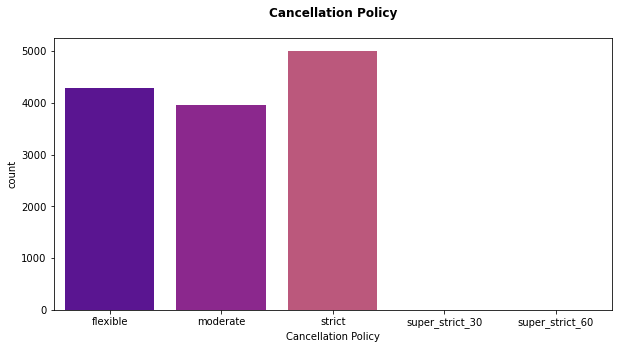

In [181]:
# Se analiza la política de cancelación
 
data = df['Cancellation Policy'].sort_values(ascending = True)
d = data.value_counts()

sns.countplot(x = data, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title(f'Cancellation Policy\n', fontweight ="bold")

In [182]:
# Se analiza la política de cancelación
p = 'Politica     ║ Cada alojamiento'
bar = '='*len(p)
print(f'{bar}\n{p}\n{bar}')
d

Politica     ║ Cada alojamiento


strict             5004
flexible           4291
moderate           3962
super_strict_60       5
super_strict_30       2
Name: Cancellation Policy, dtype: int64

Text(0.5, 1.0, 'Host ID count\n ')

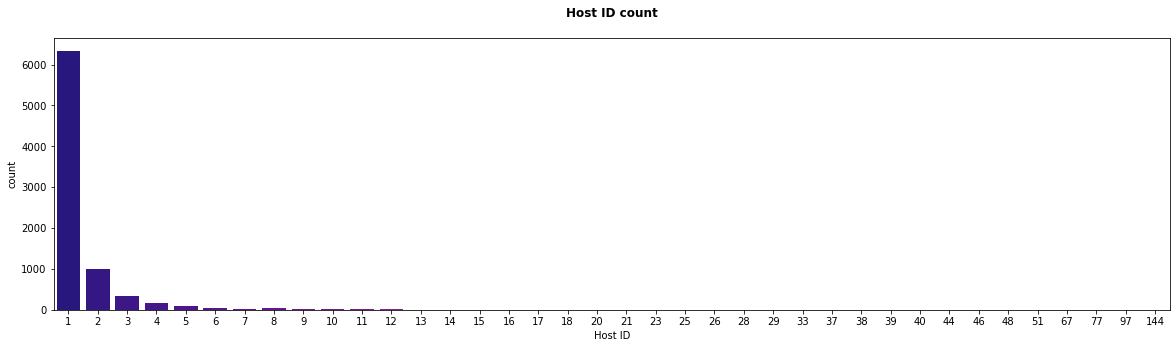

In [185]:
# Análisis de Host ID
data = df.groupby('Host ID')['Host ID'].size().sort_values(ascending = True)
d = data
sns.countplot(x = data, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(20,5)
plt.title(f'Host ID count\n ', fontweight ="bold")

In [186]:
# Se analiza el Host ID
p = 'Host Id    ║ No viviendas'
bar = '='*len(p)
print(f'{bar}\n{p}\n{bar}')
d

Host Id    ║ No viviendas


Host ID
17453         1
47055108      1
47010648      1
47005914      1
46991632      1
           ... 
1408525      51
54310958     67
3566146      77
15258781     97
21514948    144
Name: Host ID, Length: 8153, dtype: int64

<AxesSubplot:xlabel='Host ID'>

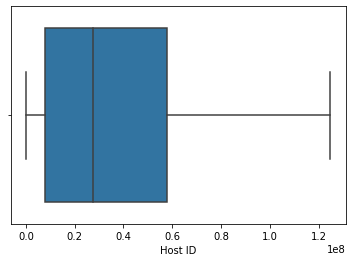

In [187]:
# Se analiza Host ID
sns.boxplot(data=df, x="Host ID")

In [188]:
# Se analiza el Host ID
df['Host ID'].describe()

count    1.326400e+04
mean     3.763181e+07
std      3.466504e+07
min      1.745300e+04
25%      7.772409e+06
50%      2.752699e+07
75%      5.763190e+07
max      1.247534e+08
Name: Host ID, dtype: float64

---
<br/><br/>

# Conclusiones:


---
<br/><br/>

**Para un análisis de un dataset de 13264 filas y 34 columnas tenemos:**
* Hay 1554 tipos de usuario Superhost con el 11.72% de los alojamientos
* Hay 11710 tipos de usuario tipo Host con el 88.28% los alojamientos

* La media del costo por alquiler tiende a ser más alta en fuentelareina y más baja en Pueblo Nuevo ()
* Según este análisis de los datos, el precio del alquiler depende de la zona donde se encuentre el host
* Los Host tienen ratios de respuesta más bajos que los Superhosts

* La cantidad de alojamientos es más alta en el distrito Cento de Madrid con 6735 Neighbourhood Group Cleansed
* La más baja es en el Distrito Vicálvaro 34 Neighbourhood Group Cleansed
* El tipo de alojamiento más común es el apartamento con 10910
* Las habitaciones más comunes son entire home/apt con una cantidad de 7875
* Las habitaciones menos comunes son shared room con una cantidad de 192
* En la variable Accommodates, se evidencia valores atípicos para las acomodaciones de >6 personas en adelante
* La cantidad de baños más común es 1 y la menos común es 7 baños, presentándose valores atípicos
* La cantidad de habitaciones más común es una por vivienda
* La cantidad de habitaciones por vivienda menos común es 8, presentándose valores atípicos
* La cantidad de camas más común es 1 por vivienda
* La cantidad de camas menos común por vivienda es de 15, presentándose valores atípicos
* La cantidad de huéspedes más común es 1 y la menos común es 14, presentándose valores atípicos
* La mediana de cantidad de personas extra es 7, se presentan valores atípicos 
* El mínimo de noches tiene una mediana de 2, presentándose valores atípicos para esta variable
* El máximo de noches tiene una mediana de 1125 noches presentándose valores atípicos para esta variable
* La política de cancelación más común es Strict con 5004 viviendas con esta política, la menos común es super_strict_30, con 2 viviendas que usan esta política
* el Host Id nos indica que hay varios anfitriones con varios hospedajes a su nombre y con una mediana de 2.75; es decir, los anfitriones tienden a tener 2 alojamientos registrados.

In [52]:
# SIGIENTES PASOS:
# - Análisis exploratorio con R
# - Análisis visual y visualización con Tableau 

# Modificamos la columna Features con valores Host = 0 y Superhost = 1. Así facilitamos el análisis en R para el análisis exploratorio y el  modelado de la regresión lineal.

df['Features'] = df['Features'].replace(to_replace= "Host", value= 0)
df['Features'] = df['Features'].replace(to_replace= "Superhost", value=1)

# Creamos un nuevo dataset con el que se trabajará en el análisis exploratorio y regresión lineal en R.
df.to_csv('airbnb-listings_clean_R.csv', sep=';', index=False)